This code is analyzing a social network dataset using the NetworkX and Matplotlib libraries in Python. The code does the following:
1) Imports necessary libraries including Matplotlib, NetworkX, Pandas and NumPy.
2) Loads a social network dataset from a specified URL using Pandas read_excel function and separates the data into two dataframes: 'Elements' which contains the node list and 'Connections' which contains the edge list.
3) Uses the NetworkX convert_matrix.from_pandas_edgelist function to create a graph object from the edge list dataframe with the 'From' and 'To' columns specifying the source and target nodes, respectively. The 'Type', 'Weight', and 'When' columns are stored as edge attributes.
4) Sets the node attributes in the graph object using the 'Label' column from the node list dataframe and sets the color of the graph using a gradient of colors based on the number of nodes in the graph.
5) Draws the initial graph using the nx.draw() function with node size, color and edge color parameters. Then sets the background color of the plot.
6) Computes the degree centrality of each node in the graph using nx.degree_centrality() function and assigns the resulting centrality values to the colors of the nodes.
7) Draws a new graph with the updated node colors and background color.
8) Computes the closeness centrality of each node in the graph using nx.closeness_centrality() function and assigns the resulting centrality values to the colors of the nodes.
9) Draws a new graph with the updated node colors and background color.
10) Samples the top 10 nodes with highest closeness centrality values.
11) Computes the betweenness centrality of each node in the graph using nx.betweenness_centrality() function and assigns the resulting centrality values to the colors of the nodes.
12) Draws a new graph with the updated node colors and background color.
13) Computes the Katz centrality of each node in the graph using nx.katz_centrality() function and assigns the resulting centrality values to the colors of the nodes.
14) Draws a new graph with the updated node colors and background color.
The resulting code produces a series of plots that visualize the social network dataset and highlight the most important nodes based on different centrality measures.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from random import sample
import numpy as np

url = 'https://github.com/vanshika230/Facebook-Network-Analysis/blob/main/Social%20Network%20Dataset.xlsx?raw=true'

network_data = pd.read_excel(url, sheet_name=['Elements', 'Connections'])
node_data = network_data['Elements']
edge_data = network_data['Connections']
edge_columns = ['Type', 'Weight', 'When']

graph = nx.convert_matrix.from_pandas_edgelist(edge_data,
                                               source='From',
                                               target='To',
                                               edge_attr=edge_columns)

node_dict = node_data.set_index('Label').to_dict(orient='index')
nx.set_node_attributes(graph, node_dict)


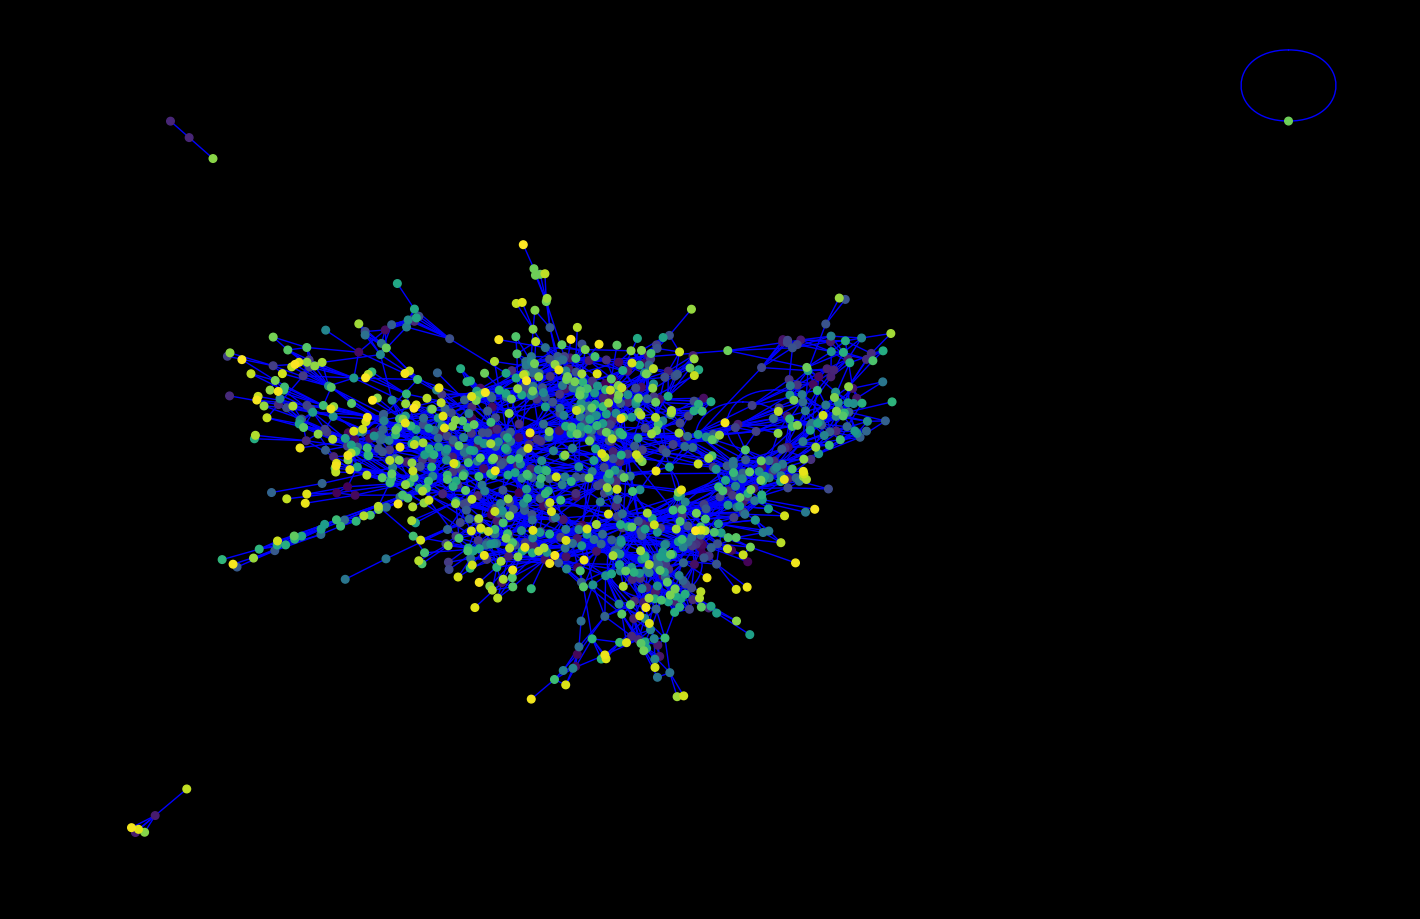

In [2]:
fig = plt.figure(figsize = (14, 9))
colors = np.linspace(0, 1, len(graph.nodes))
nx.draw(graph, 
        node_size  = 30,
        node_color = colors,
        edge_color = 'b')
fig.set_facecolor('black')

## Finding Degree Centrality
In a social network dataset, the degree centrality of a node can have several implications. For example, a node with high degree centrality is likely to be a popular and influential member of the network, with many connections to other nodes. Such a node may be a central figure in the network, and its removal may have a significant impact on the network's overall structure and dynamics.
On the other hand, nodes with low degree centrality may be peripheral members of the network, with fewer connections to other nodes. They may have limited influence on the network's dynamics, but they may also play important roles as connectors between different subgroups or communities within the network.

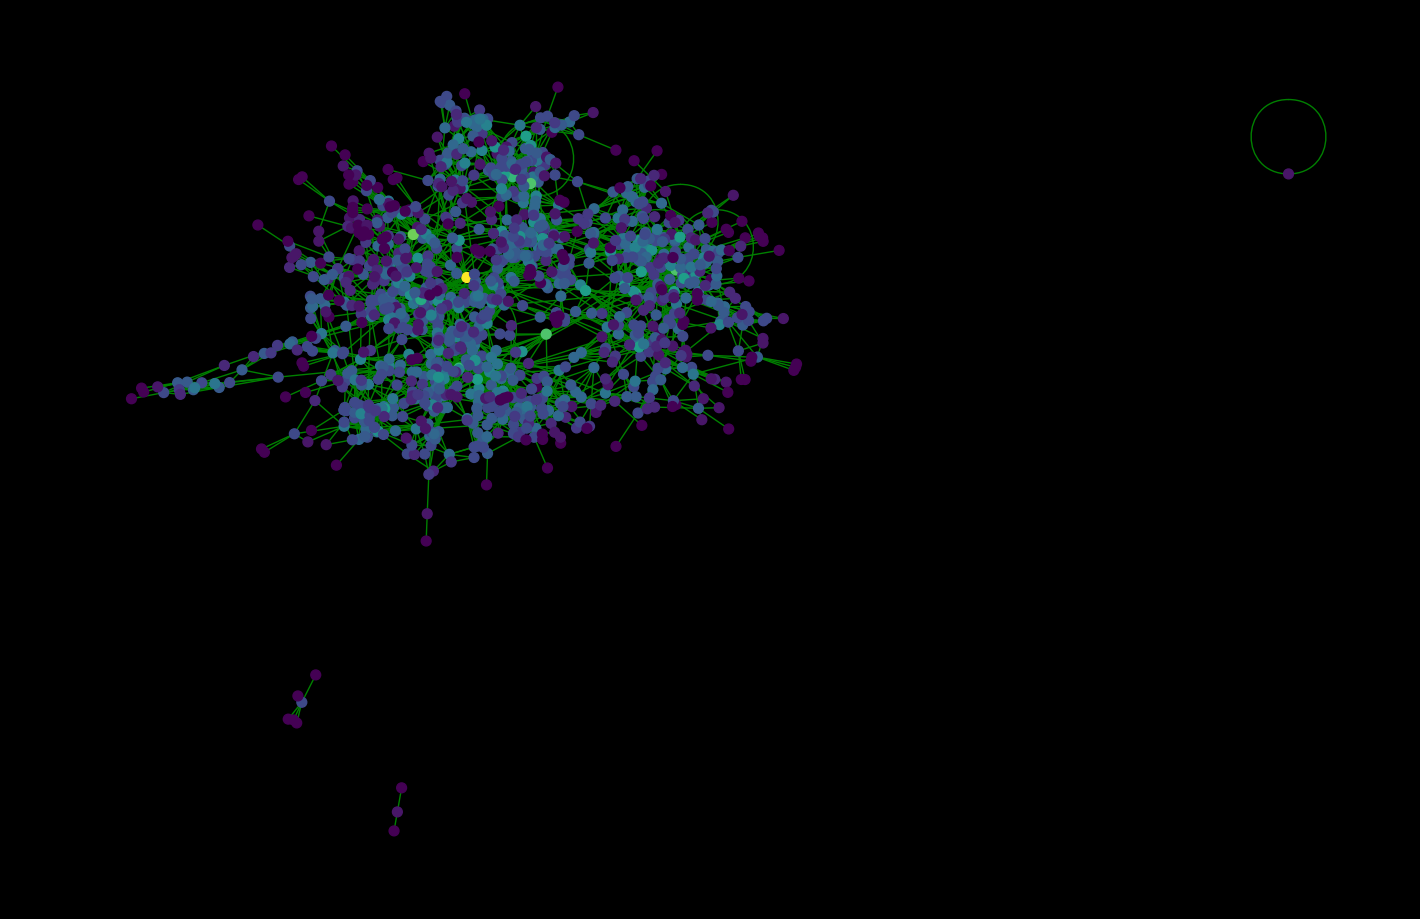

In [3]:
fig = plt.figure(figsize = (14, 9))

centrality = nx.degree_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size = 50,
        node_color = colors,
        edge_color = 'g')
fig.set_facecolor('k')

## Finding Closeness Centrality
The implication of closeness centrality on social network dataset is that it can help to identify key nodes that are important for spreading information quickly throughout the network. For example, if a social network represents a community of people interested in a particular topic, nodes with high closeness centrality may represent key opinion leaders or influencers who are able to quickly spread information and ideas to the rest of the community. Identifying these nodes can be useful for targeted marketing or outreach efforts, or for understanding how information or influence flows through the network.

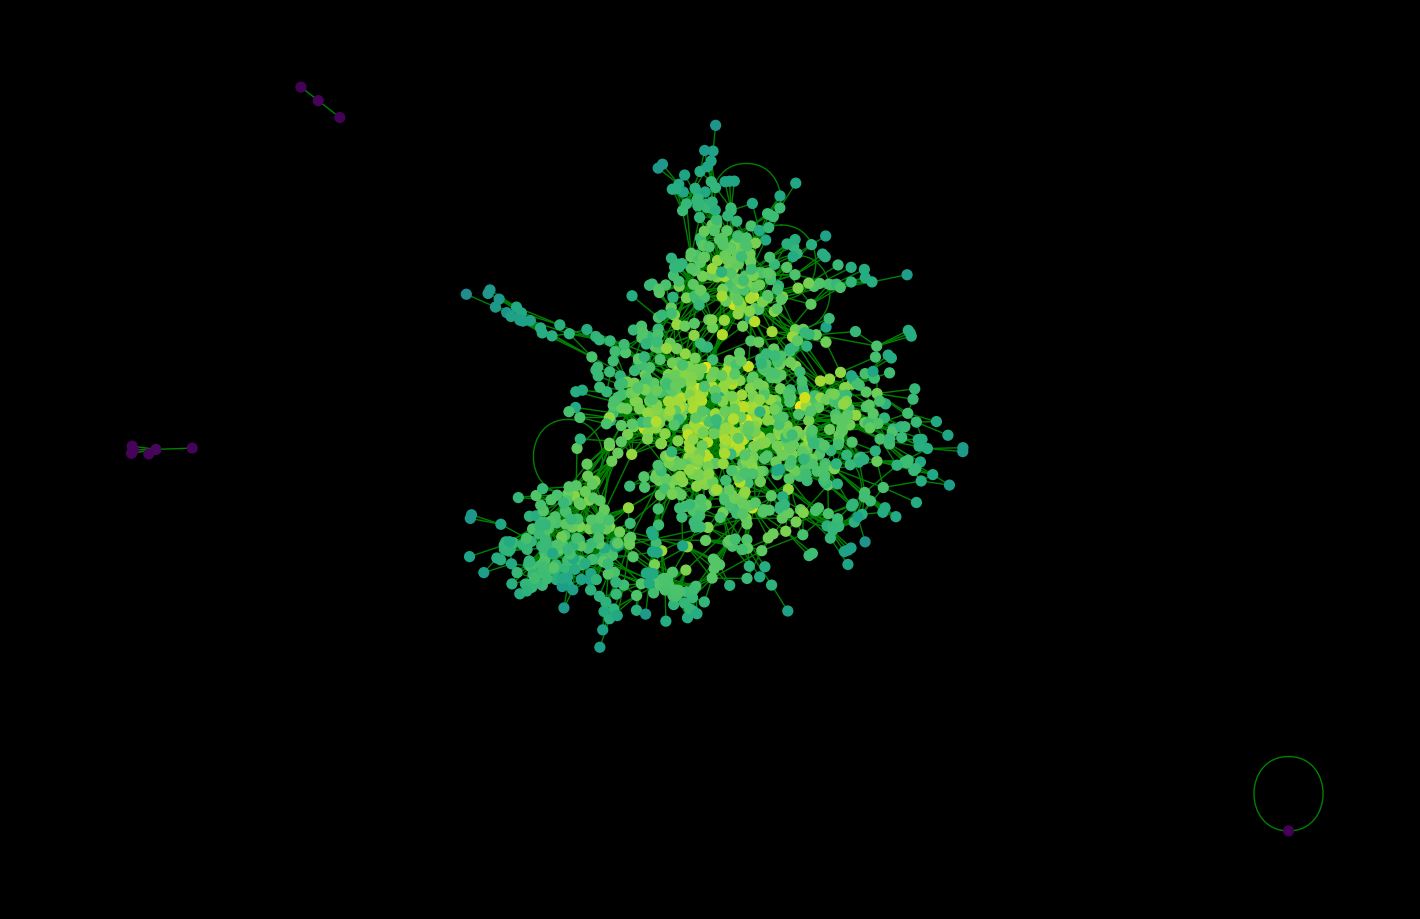

In [5]:
fig = plt.figure(figsize = (14, 9))

centrality = nx.closeness_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size = 50,
        node_color = colors,
        edge_color = 'g')
fig.set_facecolor('k')

In [6]:
sample(centrality.items(), 10)

[('S-821aa5', 0.14177862496884597),
 ('S-aac476', 0.18065411415188806),
 ('S-768ed7', 0.15215940446805784),
 ('S-f37cfd', 0.1603617311010329),
 ('S-168823', 0.18858952415405467),
 ('S-a17e2b', 0.16782415415484675),
 ('S-70f591', 0.16691596306144257),
 ('S-dafc7a', 0.13088597349161915),
 ('S-c80bd2', 0.1671063434014043),
 ('S-258f7c', 0.11209677626410192)]

## Finding Betweenness Centrality
In a social network, a node with high betweenness centrality may be an individual who serves as a connector between different groups or communities. This person may have social capital and be able to influence information flow between these different groups. In some cases, they may act as a gatekeeper, controlling access to information or resources.

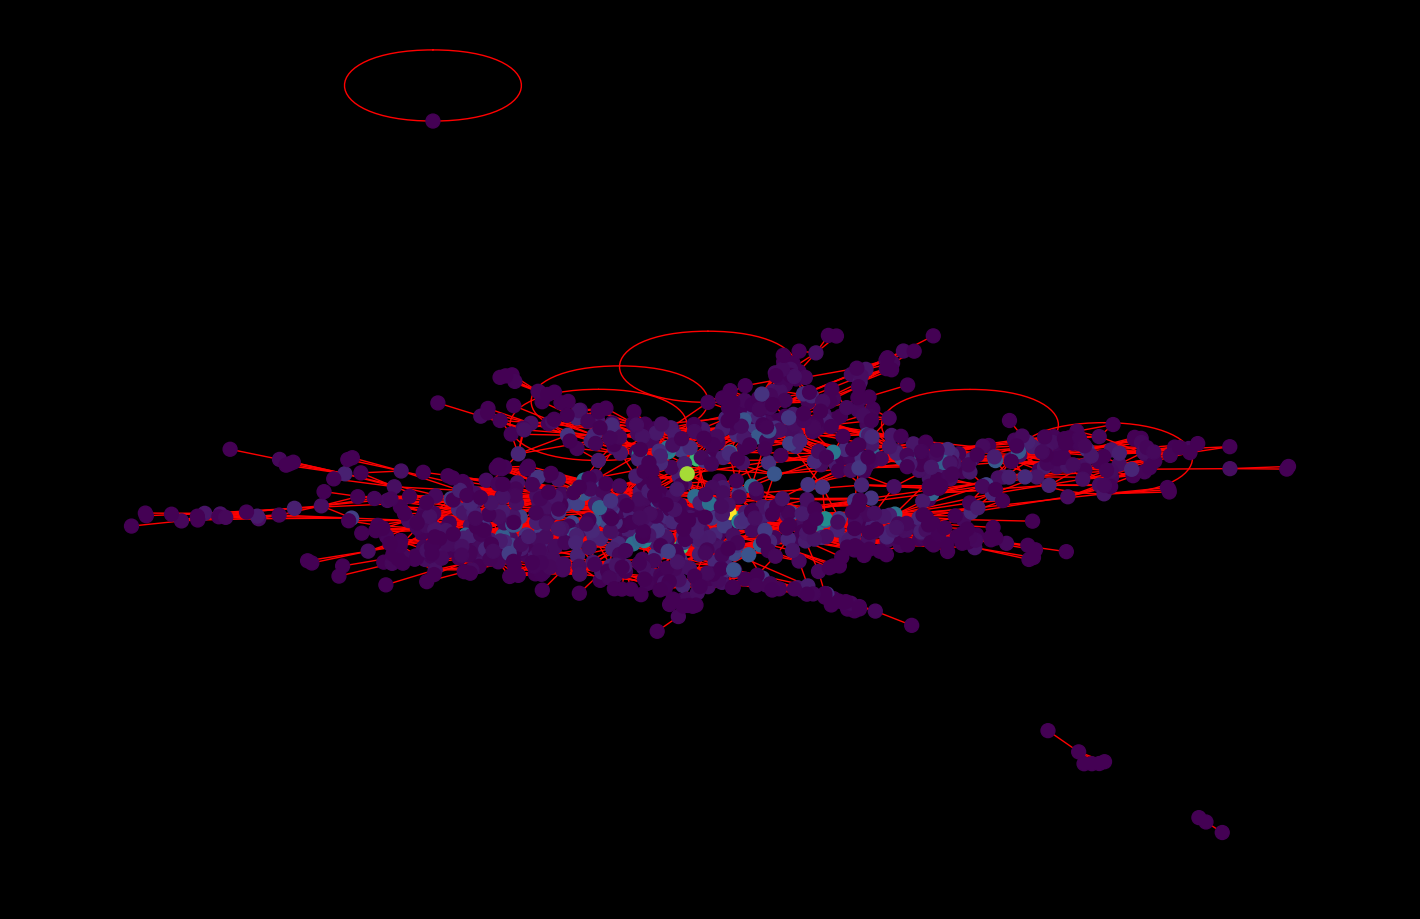

In [7]:
fig = plt.figure(figsize = (14, 9))

centrality = nx.betweenness_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size = 100,
        node_color = colors,
        edge_color = 'r')
fig.set_facecolor('k')

# Finding Katz Centrality
In the context of a social network dataset, the Katz centrality can be used to identify the key players or influencers in the network. These key players can be individuals who have a large number of connections and are also connected to other influential individuals in the network.

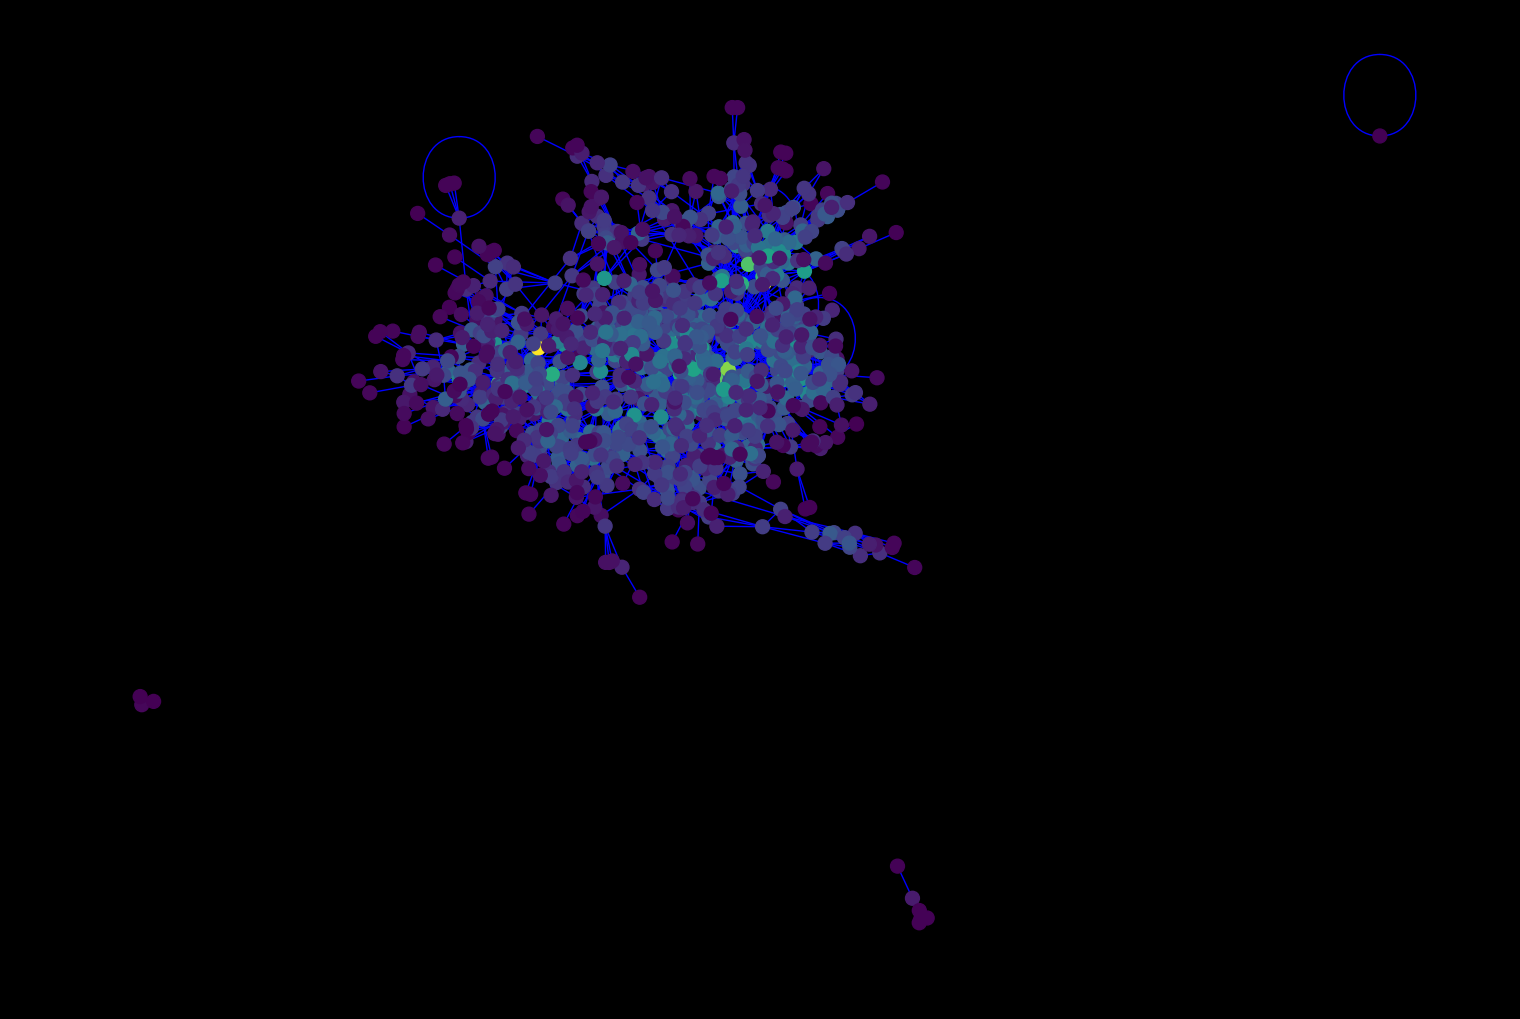

In [8]:
fig = plt.figure(figsize = (15, 10))

centrality = nx.katz_centrality(graph)
colors = list(centrality.values())

nx.draw(graph, 
        node_size = 100,
        node_color = colors,
        edge_color = 'b')
fig.set_facecolor('k')